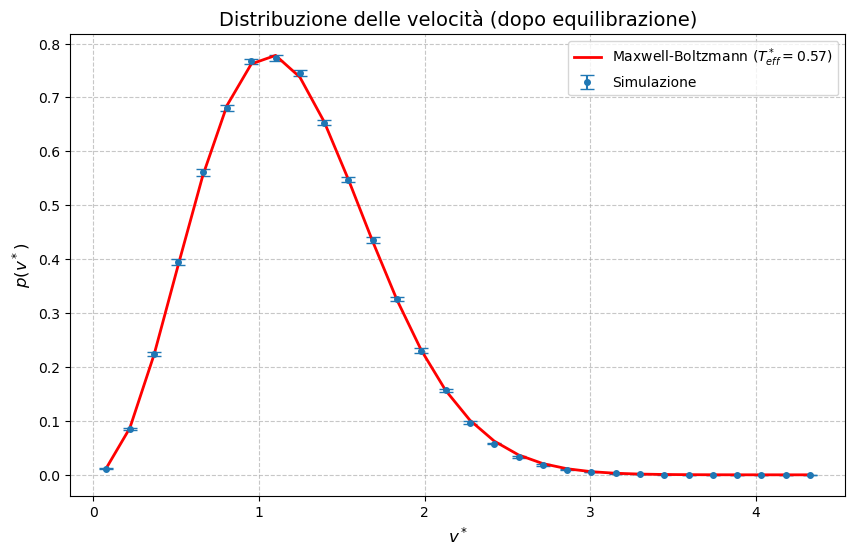

In [1]:
import numpy as np               # Importa NumPy per operazioni numeriche
import matplotlib.pyplot as plt  # Importa Matplotlib per la generazione di grafici

# Parametri
n_bins = 30                      # Numero di bin per ciascun blocco di velocità
equilibration_blocks = 0         # Numero di blocchi da ignorare come fase di equilibrazione

# Caricamento dei dati della distribuzione delle velocità
data = np.loadtxt("pofv.dat")[equilibration_blocks * n_bins:, :]
v = data[:, 0]                   # Velocità (v*)
p_sim = data[:, 1]               # Distribuzione simulata
p_err = data[:, 2]               # Incertezza statistica (errore su p_sim)

# Caricamento dati energia cinetica per calcolo T_eff
kinetic_data = np.loadtxt("kinetic_energy.dat", usecols=2)[equilibration_blocks:]
K_avg = np.mean(kinetic_data)    # Media della KE (dopo equilibrazione)
T_eff = (2.0 / 3.0) * K_avg       # Temperatura efficace (in unità ridotte)

# Calcolo distribuzione teorica di Maxwell–Boltzmann
p_theory = (1.0 / ((2 * np.pi * T_eff) ** 1.5)) * 4 * np.pi * v**2 * np.exp(-(v**2) / (2 * T_eff))

# Plot dei dati
plt.figure(figsize=(10, 6))  # Imposta dimensioni del grafico

# Punti simulati con barre d'errore
plt.errorbar(v, p_sim, yerr=p_err, fmt='o', markersize=4, capsize=5, label='Simulazione')

# Curva teorica MB
plt.plot(v, p_theory, 'r-', linewidth=2, label=f'Maxwell-Boltzmann ($T_{{eff}}^*={T_eff:.2f}$)')

# Etichette e titolo
plt.xlabel(r'$v^*$', fontsize=12)
plt.ylabel(r'$p(v^*)$', fontsize=12)
plt.title('Distribuzione delle velocità (dopo equilibrazione)', fontsize=14)

# Altre impostazioni grafiche
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()


### 📊 Commento al grafico

Il grafico prodotto confronta la **distribuzione delle velocità delle particelle ottenuta dalla simulazione di dinamica molecolare** (punti blu con barre d'errore) con la **distribuzione teorica di Maxwell–Boltzmann** in tre dimensioni (curva rossa continua), calcolata alla temperatura efficace $ T_{\text{eff}}^* $ estratta dall'energia cinetica media simulata.

#### Cosa si osserva:

- I **punti simulati** seguono bene l’andamento della curva teorica: ciò indica che, dopo la fase di equilibrazione, il sistema ha raggiunto uno stato termico in cui le velocità sono distribuite secondo la statistica di Maxwell–Boltzmann.
- Il **picco della distribuzione** è attorno a $ v^* \approx 1.1 $, in accordo con il valore previsto teoricamente della velocità più probabile $ v_{\text{mp}}^* = \sqrt{2 T^*} $.
- Le **barre d’errore** rappresentano l’incertezza statistica ottenuta con il metodo del data blocking e mostrano che la simulazione è ben convergente.
- La **temperatura efficace** è ottenuta da $ T^* = \frac{2}{3} \langle K \rangle $, sfruttando la relazione valida per un gas ideale tridimensionale in unità ridotte.

#### Interpretazione fisica:

Questo confronto mostra che il sistema, partendo da condizioni iniziali ordinate, evolve spontaneamente verso una distribuzione di equilibrio in cui l’energia cinetica è distribuita secondo la legge di Maxwell–Boltzmann. Si tratta di un’osservazione diretta del **raggiungimento dell’equilibrio termico** e dell’**aumento dell’entropia**: le componenti della velocità si mescolano a causa delle interazioni tra le particelle, e la distribuzione finale è isotropa e ben descritta dalla teoria statistica classica.

In conclusione, il grafico fornisce **una chiara validazione numerica** del comportamento atteso per un gas ideale in equilibrio e conferma la correttezza dell’implementazione della simulazione di dinamica molecolare.
